# Task 1

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Sumit Redekar

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Getting data

In [5]:
data = pd.read_csv('student_scores - student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
#changing plotting style
plt.style.use('fivethirtyeight')

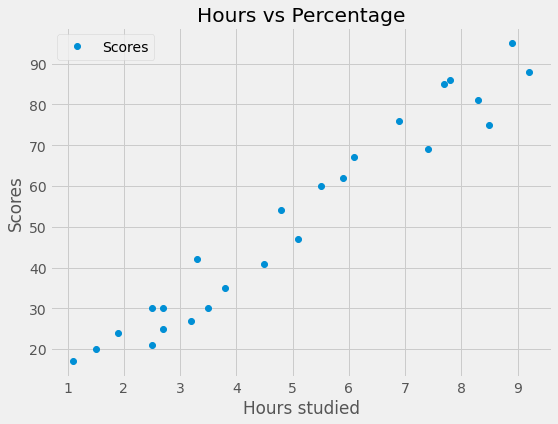

In [17]:
#Plotting distribution of scores
data.plot('Hours','Scores',style='o',figsize=(8,6))
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

We can clearly see that there is positive linear relation.

### Preparing data

In [30]:
from sklearn.model_selection import train_test_split

#Getting our X and y
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

#splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

### Training the algorithm

After splitting the data into training and testing data, time to train the algorithm

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

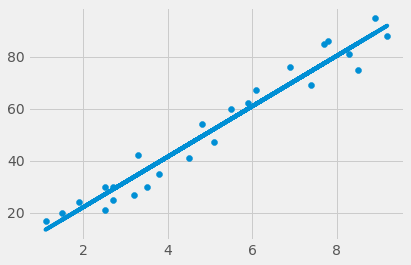

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

Time to make some predictions on test data

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [40]:
# testing with our own data
Hours=9.25
print('The hours for which marks are predicted = {}'.format(Hours))
print('The marks predicted for this time is = {}'.format(regressor.predict([[Hours]])))

The hours for which marks are predicted = 9.25
The marks predicted for this time is = [92.38611528]


### Evaluating the model

In [41]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  3.9207511902099244


### Thankyou